In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()
import statsmodels.formula.api as sm
%matplotlib inline

In the Advertising example, this data set consists of the TV advertising budget and product sales in n = 200 different markets.

In [97]:
df = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [118]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [119]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


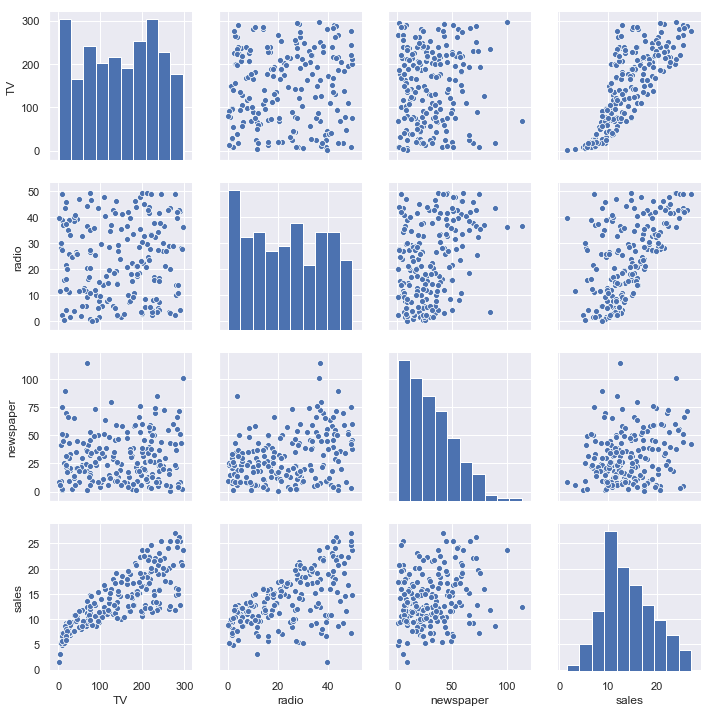

In [120]:
sns.pairplot(data=df)
plt.show()

/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


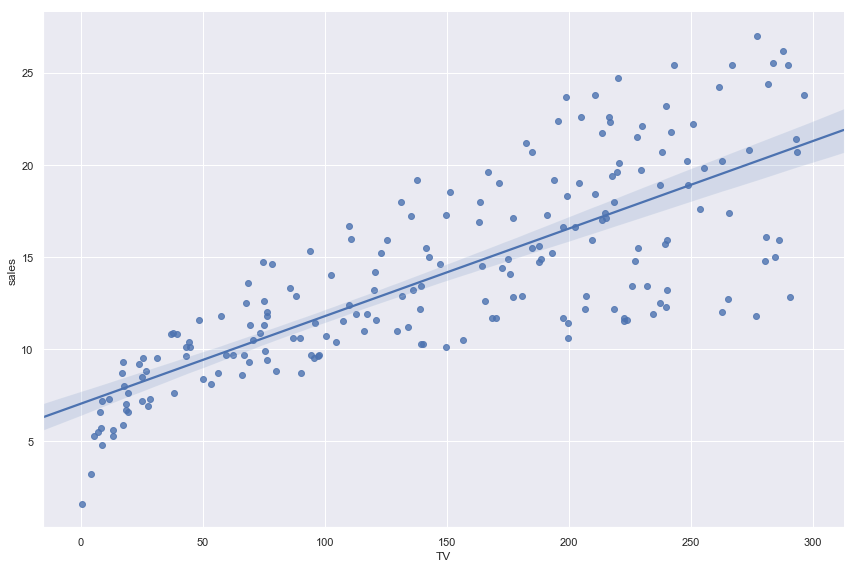

In [101]:
# Figure 3.1
sns.lmplot(x='TV', y='sales', data=df, height=8, aspect=1.5)
plt.show()

In [102]:
# sklearn 

model = LinearRegression(fit_intercept=True)

x=df['TV']
y=df['sales']

reg = model.fit(x[:, np.newaxis], y)
print(reg.coef_)
print(reg.intercept_)

[0.04753664]
7.0325935491276965


In [165]:
# statsmodel

lm = sm.ols('sales~TV', data=df).fit()

In [166]:
# Table 3.1
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           1.47e-42
Time:                        14:50:23   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
# Resididual Standard Error calculation
print("RSE calculated: " + str(np.sqrt(lm.ssr/lm.df_resid)))

RSE calculated: 3.258656368650463


In [152]:
# equivalent way to calculate RSE
np.sqrt(lm.scale)

3.258656368650463

In [126]:
# RSS (ssr)
lm.ssr

# available attributes from statsmodel regressionresults
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html

2102.5305831313517

In [127]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [128]:
lm.bse

Intercept    0.457843
TV           0.002691
dtype: float64

In [153]:
# Table 3.4
lm = sm.ols('sales~TV+radio+newspaper', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 09 Oct 2018   Prob (F-statistic):           1.58e-96
Time:                        14:23:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
# calculate RSE
np.sqrt(lm.scale)

1.6855103734147439

In [158]:
# calculate mean 'sales'
df.describe().loc['mean']['sales']

14.0225

In [ ]:
# calculate % error (RSE/mean of sales)
# 3.4 The Marketing Plan question #2
np.sqrt(lm.scale)/df.describe().loc['mean']['sales']

In [162]:
lm.fittedvalues

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
5      12.478348
6      11.729760
7      12.122953
8       3.727341
9      12.550849
10      7.032299
11     17.285129
12     10.577121
13      8.826300
14     18.434366
15     20.819300
16     12.823657
17     23.224957
18      9.951682
19     14.166073
20     18.100767
21     14.740538
22      6.489150
23     16.545933
24      8.146519
25     15.610039
26     14.989514
27     17.051673
28     19.410538
29      9.144024
         ...    
170     7.394980
171    14.358274
172     7.607692
173    11.970939
174    13.744357
175    24.786870
176    19.979373
177    12.162046
178    16.010997
179    12.384555
180    10.587200
181    13.928099
182     6.554670
183    24.133100
184    18.538521
185    20.803011
186     9.691373
187    17.076442
188    18.644306
189     6.051624
190    12.489159
191     8.424019
192     4.466230
193    18.486958
194    16.495300
195     5.370342
196     8.165312
197    12.7859

/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


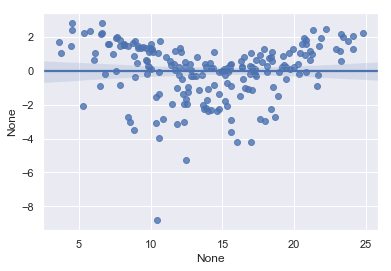

In [163]:
# similar to Figure 3.11 and 3.12 (Residual plots) residuals v fitted values
#sns.regplot(lm.predict(), lm.resid)
sns.regplot(lm.fittedvalues, lm.resid)
plt.show()

In [110]:
# Table 3.5
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000
